In [22]:
!pip install pyod

  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.59.1-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached numba-0.59.1-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl (46.2 MB)
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.mad import MAD
from pyod.models.iforest import IForest

In [13]:
apple=pd.read_csv("apple_google.csv")

In [15]:
apple.head()

,Date,AAPL,GOOG
0,2010-01-04,NaN,313.06
1,2010-01-05,NaN,311.68
2,2010-01-06,NaN,303.83
3,2010-01-07,NaN,296.75
4,2010-01-08,NaN,300.71


In [16]:
# Convert the Date column to DateTime
apple['Date'] = pd.to_datetime(apple['Date'])

# Create a column for the day of the week
apple['day_of_week'] = apple['Date'].dt.day_of_week

# Create a column for the month
apple['month'] = apple['Date'].dt.month

# Create a column for the day of the month
apple['day_of_month'] = apple['Date'].dt.day

print(apple[['day_of_week', 'month', 'day_of_month']])

      day_of_week  month  day_of_month
0               0      1             4
1               1      1             5
2               2      1             6
3               3      1             7
4               4      1             8
...           ...    ...           ...
1859            2      5            24
1860            3      5            25
1861            4      5            26
1862            1      5            30
1863            2      5            31

[1864 rows x 3 columns]


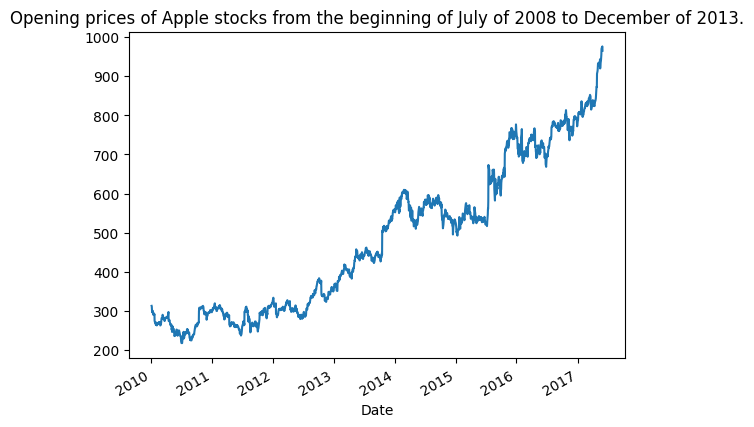

In [17]:
# Set the Date column as a DatetimeIndex
apple.set_index("Date",inplace=True)

# Plot the opening prices for the instructed range
apple["GOOG"].plot()

plt.title("Opening prices of Apple stocks from the beginning of July of 2008 to December of 2013.")
plt.show()

# MAD on time series
Initially, you can approach time series anomaly detection just like a regular dataset. For example, you can take a univariate approach and fit MAD to one of the time series columns.

pandas and the MAD estimator are already loaded for you.

In [24]:
# Load the Apple stocks dataset with a proper DatatimeIndex
apple = pd.read_csv("apple_google.csv", parse_dates=["Date"], index_col="Date")

# Fit MAD to the Volume column
mad = MAD().fit(apple[['GOOG']])

# Isolate the outliers
is_outlier = mad.labels_==1
outliers = apple[is_outlier]

print(len(outliers))

0


In [27]:
# Create three new features from the DatetimeIndex
apple['day_of_week'] = apple.index.day_of_week
apple['month'] = apple.index.month
apple['day_of_month'] = apple.index.day

# Isolation Forest on time series
If you want to use all the information available, you can fit a multivariate outlier detector to the entire dataset. The multivariate approach also enables you to extract more features from time series to enhance model performance.

Practice creating new features from a DatetimeIndex and fitting an outlier detector on them using the apple dataset, which has already been loaded with a DatetimeIndex.

Also, recall the random_state parameter, which can be used to generate reproducible results.

In [29]:
apple.ilo

,AAPL,GOOG,day_of_week,month,day_of_month
Date,,,,,
2010-01-04,NaN,313.06,0,1,4
2010-01-05,NaN,311.68,1,1,5
2010-01-06,NaN,303.83,2,1,6
2010-01-07,NaN,296.75,3,1,7
2010-01-08,NaN,300.71,4,1,8


In [28]:
apple['day_of_week'] = apple.index.day_of_week
apple['month'] = apple.index.month
apple['day_of_month'] = apple.index.day

# Create and fit an IForest
iforest = IForest(random_state=1).fit(apple)

# Generate outlier probabilities
probs = iforest.predict_proba(apple)

# Generate outlier probabilities
probs = iforest.predict_proba(apple)

# Isolate the outliers
is_outlier = probs[:,1] > 0.7  # 70% threshold
outliers = apple[is_outlier]

print(len(outliers))

ValueError: Input contains NaN.